<a href="https://colab.research.google.com/github/aldojda/MachineLearningUANL/blob/main/Tarea_9_ML_Experimental_Design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 5 : Unsupervised Learning

* Aplicar al menos un algoritmo no supervisado a tus datos para encontrar estructuras subyacentes

* Elegir alguna métrica para determinar número de grupos, usarla y discutirla

* Busca alguna revista científica que publique trabajos relacionados con el tuyo

* Crea artículo mediante Latex con base en los lineamientos de la revista elegida y redacta ahí tus resultados, discusiones y bibliografía

* Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados


Tarea 7 

 - Generar la parte de metodología del artículo, explicando los métodos usados con base en la literatura que los sustenta (10 pts)

## Transformación de Datos

In [ ]:
#iportamos google coolab para trabajar con archivos de Drive
from google.colab import drive
drive.mount("/content/gdrive")

#importamos librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("gdrive/MyDrive/01 - Maestría Ciencia de Datos/MachineLearningUANL/Tareas/ChurnDataSet.csv")
df.set_index('customerID', inplace = True)

def transform_float(x):
    try:
        x = float(x)
        return x
    except:
        return None
        
df.loc[:,'TotalCharges'] = df.loc[:,'TotalCharges'].apply(lambda x: transform_float(x))
df.loc[:,'TotalCharges'] = df.loc[:,'TotalCharges'].astype(float)

df.head(1)

Mounted at /content/gdrive


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   

                  Contract PaperlessBilling     PaymentMethod  MonthlyCharges  \
customerID                                                                      
7590-VHVEG  Month-to-month              Yes  Electronic check           29.85   

            TotalCharges Churn  
customerID                      
7590-VHVEG         29.85    No

## Feature Selection v2
### Categorical variables

Para las variables categóricas realizamos un análisis de selección de características para saber cual de estas variables está relacionada con
la variable de clasificación (Churn), para ello utilizaremos la prueba $\chi^2$.

$$\chi^2 = \Sigma \frac{(O_i-E_i)^2}{E_i}$$
partiendo de la siguiente prueba de Hipótesis,

$H_0$: No hay relación significativa entre las variables

$H_a$: Hay relación significativa entre las variables

donde, se rechaza la hipótesis nula si :

$$\chi^2 > \chi^2_{0.05, df}$$  


o 

$$p-value < 0.05$$ 


In [ ]:
#forma 1 de realizar la prueba
from sklearn.feature_selection import chi2

x = df_cat = df.loc[:,df.apply(lambda x: x.nunique()) <= 4]
x = pd.get_dummies(x)
y = df_cat['Churn']
f_score=chi2(x,y)

tab = pd.DataFrame(f_score).T
tab.index = x.columns
tab.columns = ['f_score', 'p_value']
tab.loc[:,'rejectH0'] = np.where(tab['p_value']< 0.05, True, False)
tab.sort_values(by = 'rejectH0')

f_score  p_value  rejectH0
gender_Female                               0.26     0.61     False
gender_Male                                 0.26     0.61     False
PhoneService_No                             0.91     0.34     False
PhoneService_Yes                            0.10     0.76     False
MultipleLines_No phone service              0.91     0.34     False
SeniorCitizen                             134.35     0.00      True
TechSupport_Yes                           135.56     0.00      True
StreamingTV_No                             70.35     0.00      True
StreamingTV_No internet service           286.52     0.00      True
StreamingTV_Yes                            17.33     0.00      True
StreamingMovies_No                         72.90     0.00      True
StreamingMovies_No internet service       286.52     0.00      True
StreamingMovies_Yes                        16.24     0.00      True
Contract_Month-to-month                   519.90     0.00      True
PaperlessBilling_No                       153.48     0.00      True
Contract_Two year                         488.58     0.00      True
TechSupport_No internet service           286.52     0.00      True
PaperlessBilling_Yes                      105.68     0.00      True
PaymentMethod_Bank transfer (automatic)    76.49     0.00      True
PaymentMethod_Credit card (automatic)      99.58     0.00      True
PaymentMethod_Electronic check            426.42     0.00      True
PaymentMethod_Mailed check                 45.65     0.00      True
Contract_One year                         176.12     0.00      True
TechSupport_No                            406.12     0.00      True
DeviceProtection_No                       251.67     0.00      True
DeviceProtection_No internet service      286.52     0.00      True
Partner_No                                 77.00     0.00      True
Partner_Yes                                82.41     0.00      True
Dependents_No                              56.90     0.00      True
Dependents_Yes                            133.04     0.00      True
MultipleLines_No                            3.87     0.05      True
MultipleLines_Yes                           6.55     0.01      True
InternetService_DSL                        71.31     0.00      True
DeviceProtection_Yes                       20.23     0.00      True
InternetService_Fiber optic               374.48     0.00      True
OnlineSecurity_No                         416.18     0.00      True
OnlineSecurity_No internet service        286.52     0.00      True
OnlineSecurity_Yes                        147.30     0.00      True
OnlineBackup_No                           284.07     0.00      True
OnlineBackup_No internet service          286.52     0.00      True
OnlineBackup_Yes                           31.22     0.00      True
Churn_No                                 1869.00     0.00      True
InternetService_No                        286.52     0.00      True
Churn_Yes                                5174.00     0.00      True

In [ ]:
#forma 2 de realizar el test
from scipy.stats import chi2_contingency
from scipy import stats

df_cat = df.loc[:,df.apply(lambda x: x.nunique()) <= 4]
chi2_tab = []
for i in df_cat.columns[:-1]:
    tab = pd.crosstab(df_cat['Churn'], df_cat[i])
    stat, p, dof, expected = chi2_contingency(tab.values)
    tab = pd.DataFrame({'variable': i,'Chi2':stat,'valor_critico': stats.chi2.isf(0.05,dof) ,'p-valor': p,'df': dof, 'RechazaHo': [True if p<0.05 else False]})
    chi2_tab.append(tab)
pd.concat(chi2_tab).sort_values(by = 'RechazaHo')

variable    Chi2  valor_critico  p-valor  df  RechazaHo
0            gender    0.48           3.84     0.49   1      False
0      PhoneService    0.92           3.84     0.34   1      False
0     SeniorCitizen  159.43           3.84     0.00   1       True
0           Partner  158.73           3.84     0.00   1       True
0        Dependents  189.13           3.84     0.00   1       True
0     MultipleLines   11.33           5.99     0.00   2       True
0   InternetService  732.31           5.99     0.00   2       True
0    OnlineSecurity  850.00           5.99     0.00   2       True
0      OnlineBackup  601.81           5.99     0.00   2       True
0  DeviceProtection  558.42           5.99     0.00   2       True
0       TechSupport  828.20           5.99     0.00   2       True
0       StreamingTV  374.20           5.99     0.00   2       True
0   StreamingMovies  375.66           5.99     0.00   2       True
0          Contract 1184.60           5.99     0.00   2       True
0  PaperlessBilling  258.28           3.84     0.00   1       True
0     PaymentMethod  648.14           7.81     0.00   3       True

In [ ]:
df.drop(columns = ['gender', 'PhoneService'], inplace = True)

### 1.1 Codificamos Data: One-Hot Encoding

<Axes: >

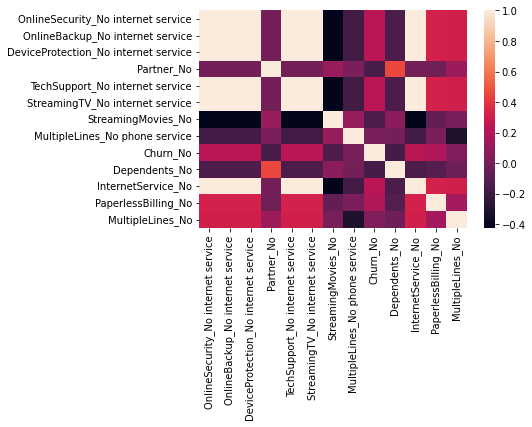

In [233]:
#codificamos variables categóricas
df_encode = pd.get_dummies(df, columns = ['Partner', 'Dependents', 'MultipleLines','InternetService',
                                                      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 
                                                     'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod', 'Churn'])
#Eliminamos columnas redudundantes correlaciones (+1 y -1), sólo nos quedaremos con 1 de ellas para evitar este problema
cat2del = ['OnlineSecurity_No internet service',
            'OnlineBackup_No internet service',
            'DeviceProtection_No internet service',
            'Partner_No',
            'TechSupport_No internet service', 'StreamingTV_No internet service',
            'StreamingMovies_No',
        'MultipleLines_No phone service','Churn_No','Dependents_No',
        'InternetService_No', 'PaperlessBilling_No', 'MultipleLines_No']
    #plt.figure(figsize=(16, 16))
#heatmap = sns.heatmap(df_encode.corr().round(2), vmin=-1, vmax=1, annot=False)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

sns.heatmap(df_encode[cat2del].corr())

como podemos observar en la matriz de correlación existen columnas **Redundantes** las cuales al codificar los valores de cada una nos dan valores de correlación igual a 1,  lo podemos ver en la gráfica como los colores blanco y negro.

guardaremos estos valores redundantes en una lista para desecharlos luego.

In [234]:
print(df_encode.shape)
df_ = df_encode.drop(columns = cat2del)
print(df_.shape)
df_ = df_.dropna()

(7043, 43)
(7043, 30)


In [ ]:
X = df_.iloc[:,:-1]
y = df_.iloc[:,-1]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## Feature Selection categoricas y Numéricas



In [ ]:
#!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

sfs = SFS(estimator = lr,        # Use logistic regression as the classifier/estimator
            k_features=20, 
          forward=True,
          scoring =  'roc_auc',  # The metric to use to evaluate the classifier is accuracy 
          cv = 5)

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [ ]:
sfs = sfs.fit(X,y)

TypeError: ignored

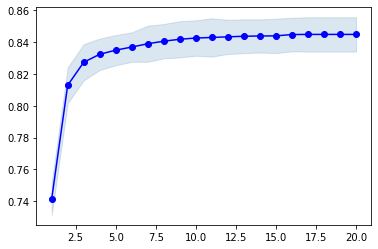

In [255]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 0.86])
#plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.savefig("sfs.pdf")
plt.show()

In [ ]:
tab = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
tab.head(10)

feature_idx  \
1                                   (1,)   
2                                 (1, 8)   
3                             (1, 8, 21)   
4                          (1, 8, 9, 21)   
5                      (1, 8, 9, 21, 27)   
6                   (1, 3, 8, 9, 21, 27)   
7               (1, 3, 8, 9, 15, 21, 27)   
8           (1, 3, 8, 9, 15, 21, 24, 27)   
9       (1, 3, 8, 9, 15, 21, 23, 24, 27)   
10  (1, 3, 8, 9, 15, 18, 21, 23, 24, 27)   

                                            cv_scores avg_score  \
1   [0.750808868826066, 0.7384881788674283, 0.7284...      0.74   
2   [0.8182219380755911, 0.8319636487878614, 0.799...      0.81   
3   [0.8334894989413525, 0.8457467735840266, 0.814...      0.83   
4   [0.8430354452790533, 0.845116502994756, 0.8219...      0.83   
5   [0.8475353443322238, 0.8455177019324848, 0.825...      0.83   
6   [0.8489162451920838, 0.8472803888782476, 0.828...      0.84   
7   [0.8542444259231459, 0.85144768107014, 0.82952...      0.84   
8   [0.8545511489819902, 0.8531068328061665, 0.831...      0.84   
9   [0.8562491264216678, 0.8552681303094151, 0.832...      0.84   
10  [0.8565157295867392, 0.8560058186787871, 0.833...      0.84   

                           feature_names ci_bound std_dev std_err  
1                                   (1,)     0.01    0.01    0.01  
2                                 (1, 8)     0.01    0.01    0.01  
3                             (1, 8, 21)     0.01    0.01    0.01  
4                          (1, 8, 9, 21)     0.01    0.01    0.00  
5                      (1, 8, 9, 21, 27)     0.01    0.01    0.00  
6                   (1, 3, 8, 9, 21, 27)     0.01    0.01    0.00  
7               (1, 3, 8, 9, 15, 21, 27)     0.01    0.01    0.01  
8           (1, 3, 8, 9, 15, 21, 24, 27)     0.01    0.01    0.01  
9       (1, 3, 8, 9, 15, 21, 23, 24, 27)     0.01    0.01    0.01  
10  (1, 3, 8, 9, 15, 18, 21, 23, 24, 27)     0.01    0.01    0.01

In [ ]:
features2select =list(df_.columns[list(tab.iloc[9,:].feature_idx)])
features2select

['tenure',
 'TotalCharges',
 'InternetService_Fiber optic',
 'OnlineSecurity_No',
 'TechSupport_No',
 'StreamingTV_Yes',
 'Contract_Month-to-month',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Electronic check']

### Discusión de Resultados

De acuerdo con Celik, los métodos para la selección de características más utilizados son los de selección de características secuenciales. En este ejercicio se utilizó un algoritmo de propagación hacia adelante, el cual permite agregar una nueva variable cada iteración.

la métrica utilizada para este análisis es la métrica roc_auc, la cual es comúnmente utilizada en análisis de dos clases, junto con un algoritmo de regresión logística el cual es utilizado para problemas de clasificación y retención de clientes (Fridrich, 2022).
Es de esperar que dentro de las variables más importantes la que tiene mayor participación es la variable de antigüedad, la cual puede explicar muy bien el modelo, por otro lado si el cliente cuenta con fibra óptica nos habla de la calidad del servicio. considero que el tema de un contrato de pago mes a mes permite al cliente poder amortizar el gasto comparado de un pago anual.
la cantidad de variables más representativas para el modelo considero que son hasta 10 las cuales son las siguientes:

```
'tenure',
 'TotalCharges',
 'InternetService_Fiber optic',
 'OnlineSecurity_No',
 'TechSupport_No',
 'StreamingTV_Yes',
 'Contract_Month-to-month',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Electronic check'
```


## Utilizando Algoritmo de Clasificación
En la siguiente sección trabajaremos con 3 modelos de Clasificación No supervisado  (K mediods y K means), con estos dos algortimos calcularemos métricas para ver cual tiene mejores resultados al momento de generar una etiqueta de Churn

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df_ = df_[features2select]
df_['Churn_Yes'] = y

In [ ]:
X = df_ [features2select].copy()
y = df_.Churn_Yes.copy()

In [ ]:
X = scaler.fit_transform(X)

In [ ]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.0 MB/s eta 0:00:00


In [ ]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)
label_kMedoids = kmedoids.labels_

from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
label_KMeans = kmeans.labels_

from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=2).fit(X)
label_AgC = agc.labels_


tab_exp_kmed = pd.DataFrame({'cluster' : label_kMedoids, 'Churn':y })
tab_exp_kmed['model'] = 'KMedoids'
tab_exp_NNC = pd.DataFrame({'cluster' : label_KMeans, 'Churn':y })
tab_exp_NNC['model'] = 'kMeans'
tab_exp_AgC = pd.DataFrame({'cluster' : label_AgC, 'Churn':y })
tab_exp_AgC['model'] = 'AgC'
results = pd.concat([tab_exp_kmed, tab_exp_NNC, tab_exp_AgC], axis = 0, ignore_index = True)
results['cluster'] = np.where(results['cluster'] == 1, 'A', 'B')

results.groupby(['model', 'cluster']).Churn.value_counts().unstack(-1)

Churn                0     1
model    cluster            
AgC      A        1527  1474
         B        3636   395
KMedoids A        3296   339
         B        1867  1530
kMeans   A        3097   249
         B        2066  1620

In [ ]:
results['predict'] = np.where(results.model.isin(['AgC']), 
                              np.where(results.cluster == 'A' , 1, 0),
                              np.where(results.cluster == 'A' , 0, 1))

results['label'] = np.where(
    results.Churn == results.predict,
    np.where(
        results.Churn  == 1, 'TP', 'TN'
        ),
        np.where(
            results.Churn  == 1, 'FP', 'FN'
            )
        )

tab_metrics = results.groupby(['model']).label.value_counts().unstack(1).fillna(0)
tab_metrics

label       FN   FP    TN    TP
model                          
AgC       1527  395  3636  1474
KMedoids  1867  339  3296  1530
kMeans    2066  249  3097  1620

<Axes: xlabel='model'>

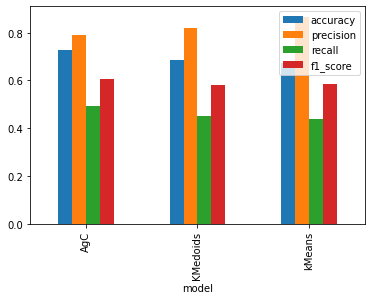

In [ ]:
def metrics_(df):
    accuracy = (df['TP']+ df['TN'] )/(df['TP']+ df['TN'] + df['FP']+ df['FN']) 
    precision = (df['TP'] )/(df['TP'] + df['FP']) 
    recall =  (df['TP'] )/(df['TP'] + df['FN']) 
    f1_score = 2 / (1/ recall + 1/ precision)
    return {'accuracy':[accuracy], 'precision' : [precision],'recall' : [recall], 'f1_score':[f1_score]}
    
res = pd.concat(
            [pd.DataFrame.from_dict(metrics_(tab_metrics.iloc[0, :])), 
            pd.DataFrame.from_dict(metrics_(tab_metrics.iloc[1, :])),
            pd.DataFrame.from_dict(metrics_(tab_metrics.iloc[2, :]))],
            axis = 0)
res.index = tab_metrics.index
res.plot(kind = 'bar')

In [ ]:
print(res)

          accuracy  precision  recall  f1_score
model                                          
AgC           0.73       0.79    0.49      0.61
KMedoids      0.69       0.82    0.45      0.58
kMeans        0.67       0.87    0.44      0.58


In [ ]:
score_ = []
from sklearn.metrics import silhouette_score
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    #centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    score_.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.23587592240232944)
For n_clusters = 3, silhouette score is 0.22858120099086796)
For n_clusters = 4, silhouette score is 0.19723757336917452)
For n_clusters = 5, silhouette score is 0.1622787763690231)
For n_clusters = 6, silhouette score is 0.17610964426282022)
For n_clusters = 7, silhouette score is 0.19583093682571778)
For n_clusters = 8, silhouette score is 0.20679539368620461)
For n_clusters = 9, silhouette score is 0.2024250392565675)


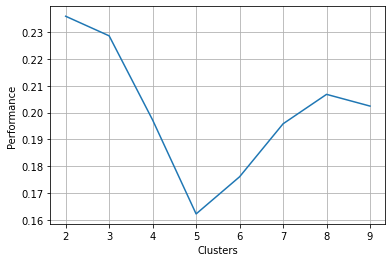

In [ ]:
plt.plot(list(range(2,10)) , score_)
plt.grid()
plt.ylabel('Performance')
plt.xlabel('Clusters')
plt.savefig("silho.pdf")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def silhouette_test(X):
    range_n_clusters = [2, 3, 4, 5, 6]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        
        clusterer = AgglomerativeClustering(n_clusters=n_clusters)
        #clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        #centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        #ax2.scatter(
            #centers[:, 0],
            #centers[:, 1],
            #marker="o",
            #c="white",
            #alpha=1,
            #s=200,
            #edgecolor="k",
        #)

        #for i, c in enumerate(centers):
         #   ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    return plt.show()

For n_clusters = 2 The average silhouette_score is : 0.23587592240232944
For n_clusters = 3 The average silhouette_score is : 0.22858120099086796
For n_clusters = 4 The average silhouette_score is : 0.19723757336917452
For n_clusters = 5 The average silhouette_score is : 0.1622787763690231
For n_clusters = 6 The average silhouette_score is : 0.17610964426282022


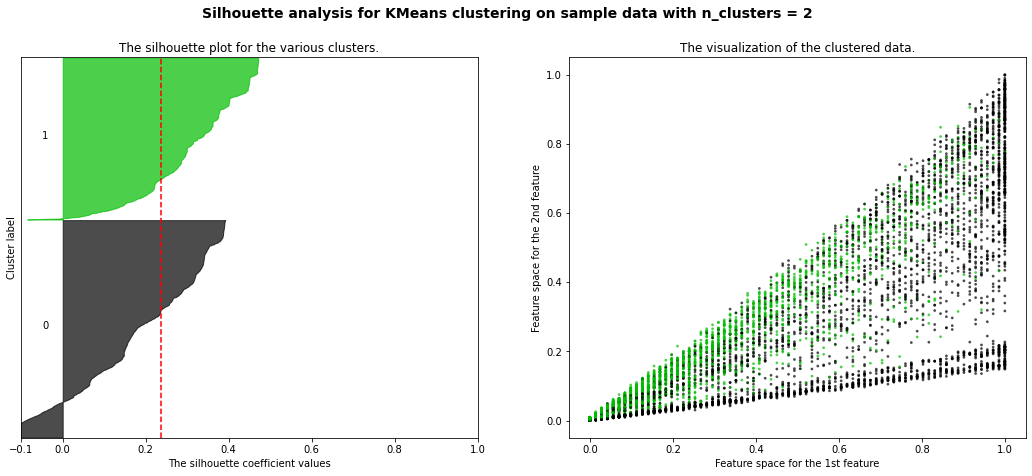

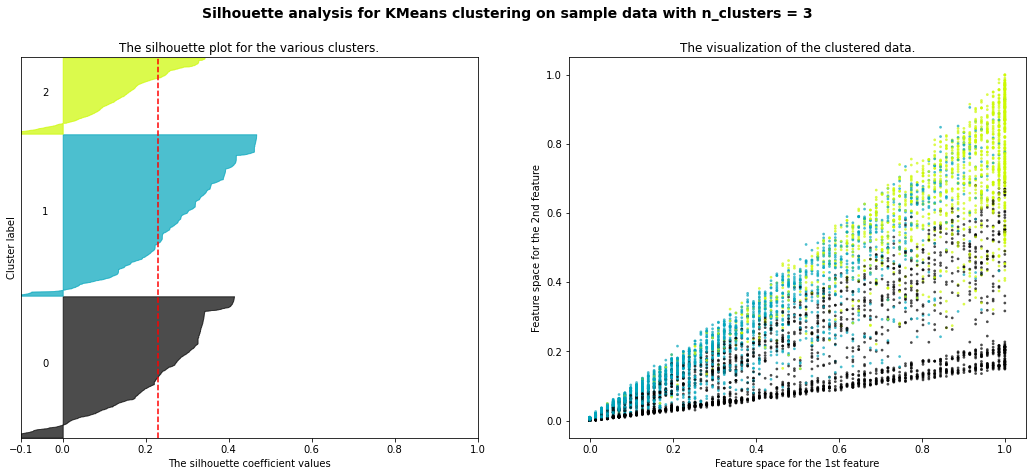

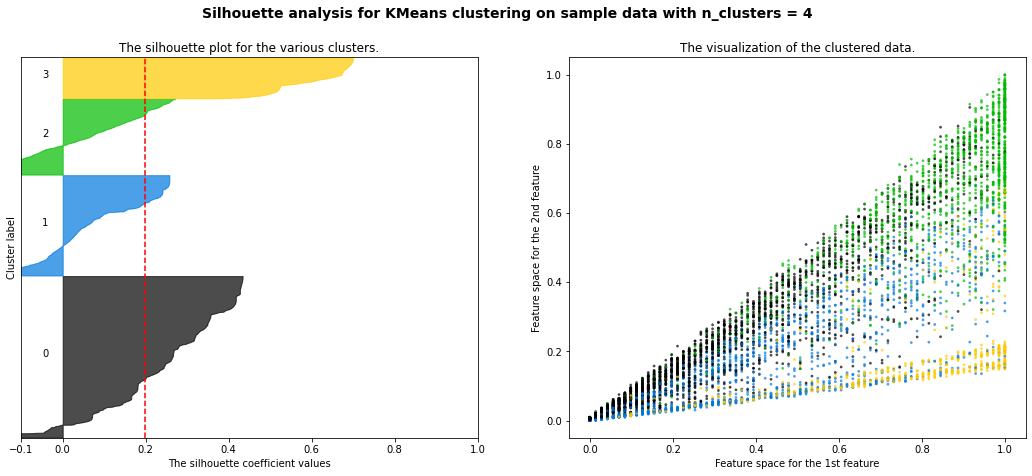

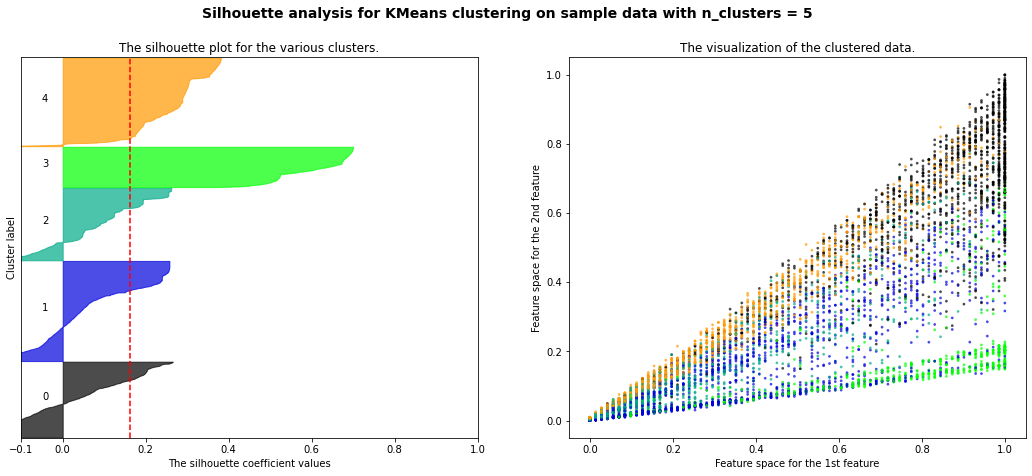

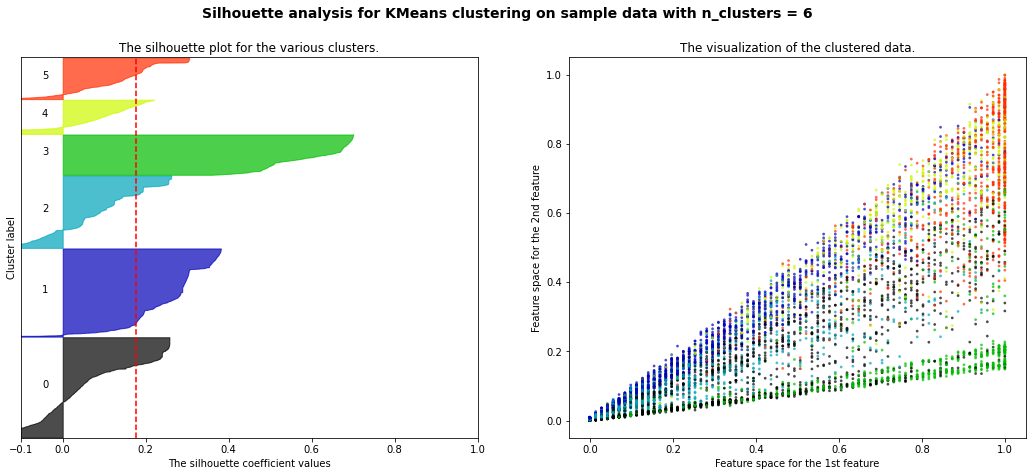

In [ ]:
from sklearn.decomposition import PCA
silhouette_test(X)

[0.36062031 0.5644274  0.65443714 0.73287682 0.80423018 0.86989862]
For n_clusters = 2 The average silhouette_score is : 0.2597903259306395
For n_clusters = 3 The average silhouette_score is : 0.20495984316717047
For n_clusters = 4 The average silhouette_score is : 0.2094073774138042
For n_clusters = 5 The average silhouette_score is : 0.22159654074413343
For n_clusters = 6 The average silhouette_score is : 0.2203322682270889


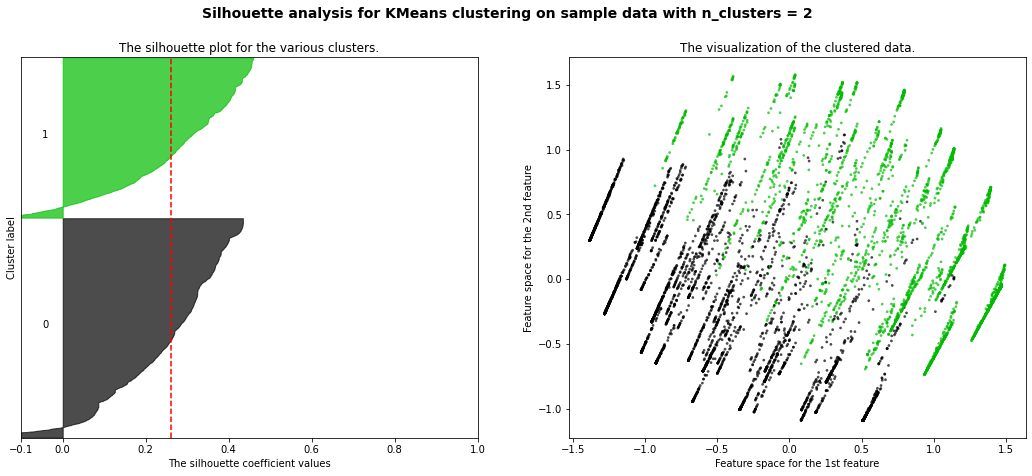

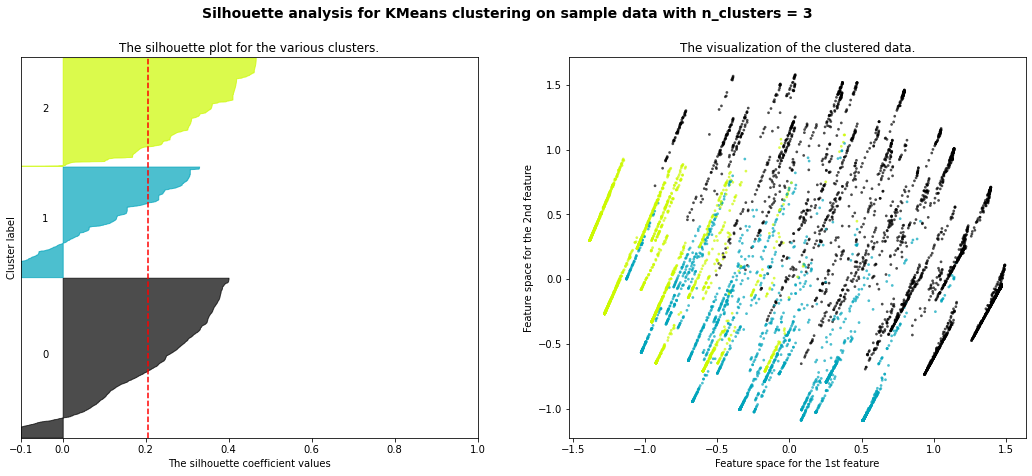

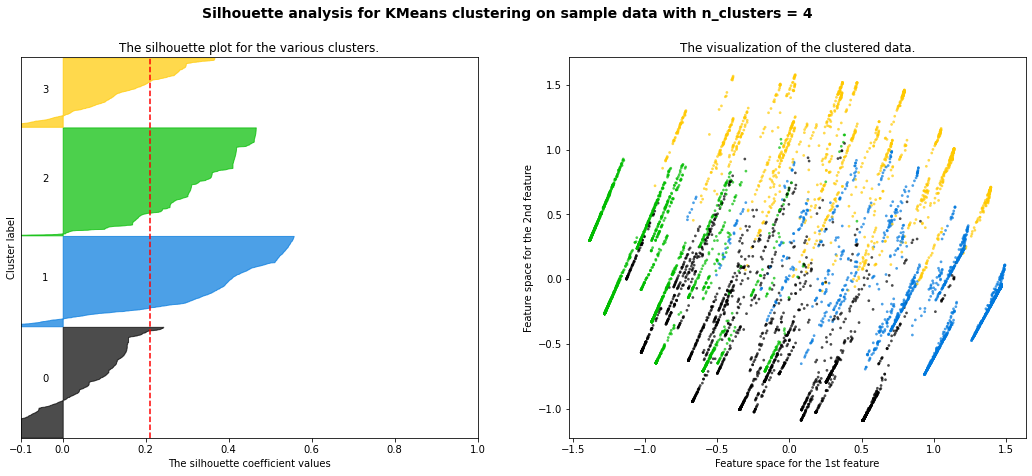

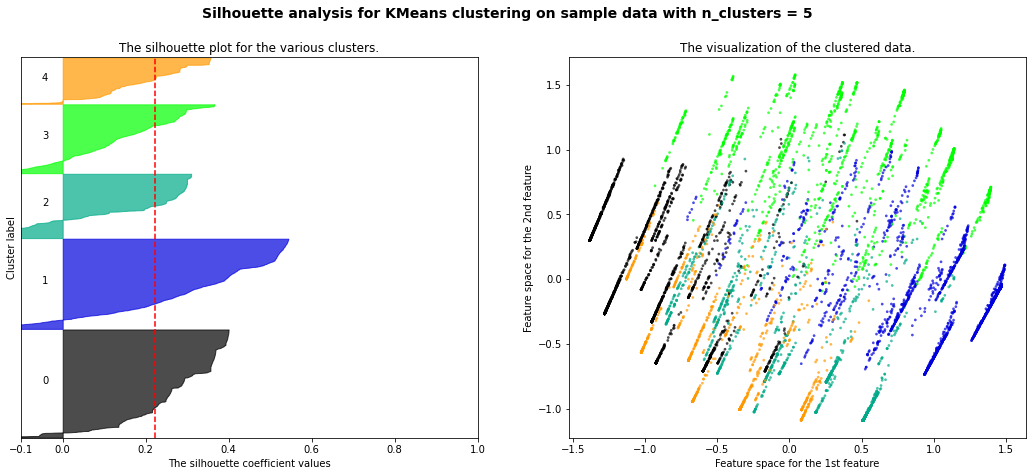

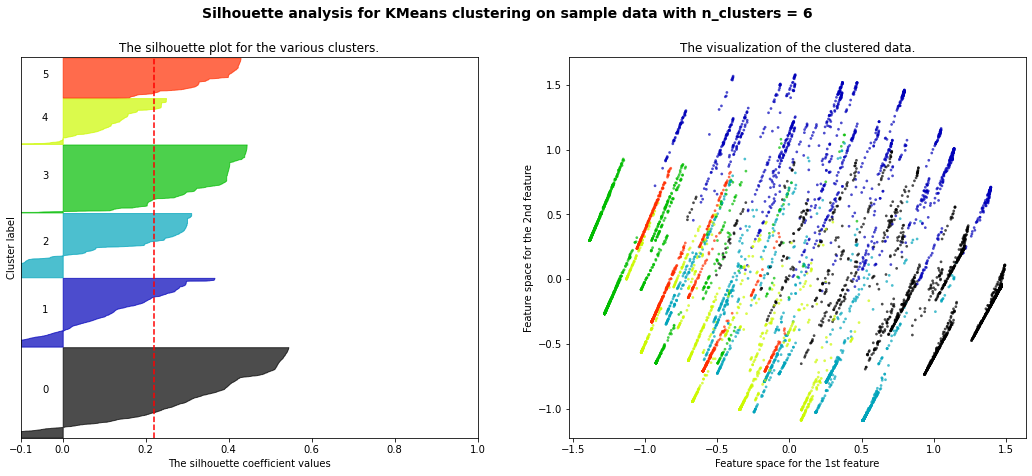

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
z = pca.fit_transform(X)
print(np.cumsum(pca.explained_variance_ratio_))

silhouette_test(z)

## PCA y visuales de Clustering

[0.36062031 0.5644274  0.65443714 0.73287682 0.80423018]


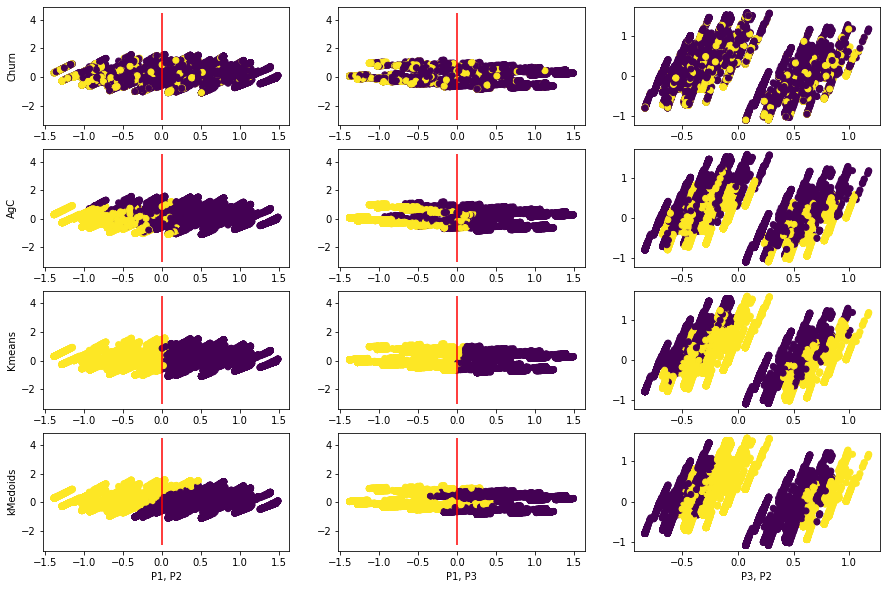

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
z = pca.fit_transform(X)
print(np.cumsum(pca.explained_variance_ratio_))

import matplotlib.pyplot as plt
fig, (ax1, ax2,ax3, ax4) = plt.subplots(4, 3, figsize = (15,10))

x1 = z[:,0]
x2 = z[:,1]
x3 = z[:,2]

y = y
y1 = label_AgC
y2 = np.where(label_KMeans == 0,1, 0 )
y3 = np.where(label_kMedoids == 0,1, 0 )

ax1[0].scatter(x1, x2, c = y)
ax1[0].vlines(x = 0, ymin = -3, ymax = 4.5, color ='r')
ax2[0].scatter(x1, x2, c = y1)
ax2[0].vlines(x = 0, ymin = -3, ymax = 4.5, color ='r')
ax3[0].scatter(x1, x2, c = y2)
ax3[0].vlines(x = 0, ymin = -3, ymax = 4.5, color ='r')
ax4[0].scatter(x1, x2, c = y3)
ax4[0].vlines(x = 0, ymin = -3, ymax = 4.5, color ='r')

ax1[1].scatter(x1, x3, c = y)
ax1[1].vlines(x = 0, ymin = -3, ymax = 4.5, color ='r')
ax2[1].scatter(x1, x3, c = y1)
ax2[1].vlines(x = 0, ymin = -3, ymax = 4.5, color ='r')
ax3[1].scatter(x1, x3, c = y2)
ax3[1].vlines(x = 0, ymin = -3, ymax = 4.5, color ='r')
ax4[1].scatter(x1, x3, c = y3)
ax4[1].vlines(x = 0, ymin = -3, ymax = 4.5, color ='r')

ax1[2].scatter(x3, x2, c = y)
ax2[2].scatter(x3, x2, c = y1)
ax3[2].scatter(x3, x2, c = y2)
ax4[2].scatter(x3, x2, c = y3)


ax1[0].set_ylabel('Churn')
ax2[0].set_ylabel('AgC')
ax3[0].set_ylabel('Kmeans')
ax4[0].set_ylabel('kMedoids')

ax4[0].set_xlabel('P1, P2')
ax4[1].set_xlabel('P1, P3')
ax4[2].set_xlabel('P3, P2')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
z = pca.fit_transform(X)

y = y
y1 = label_AgC
y2 = np.where(label_KMeans == 0,1, 0 )
y3 = np.where(label_kMedoids == 0,1, 0 )

--------------------
--------------------
--------------------
--------------------


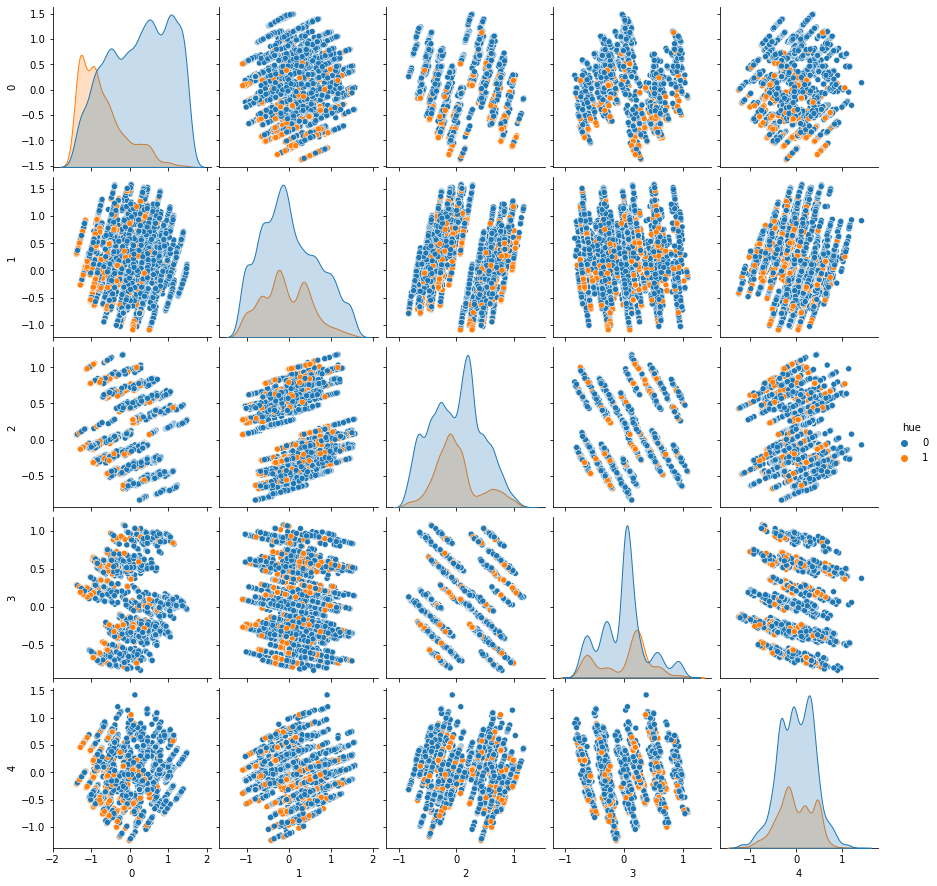

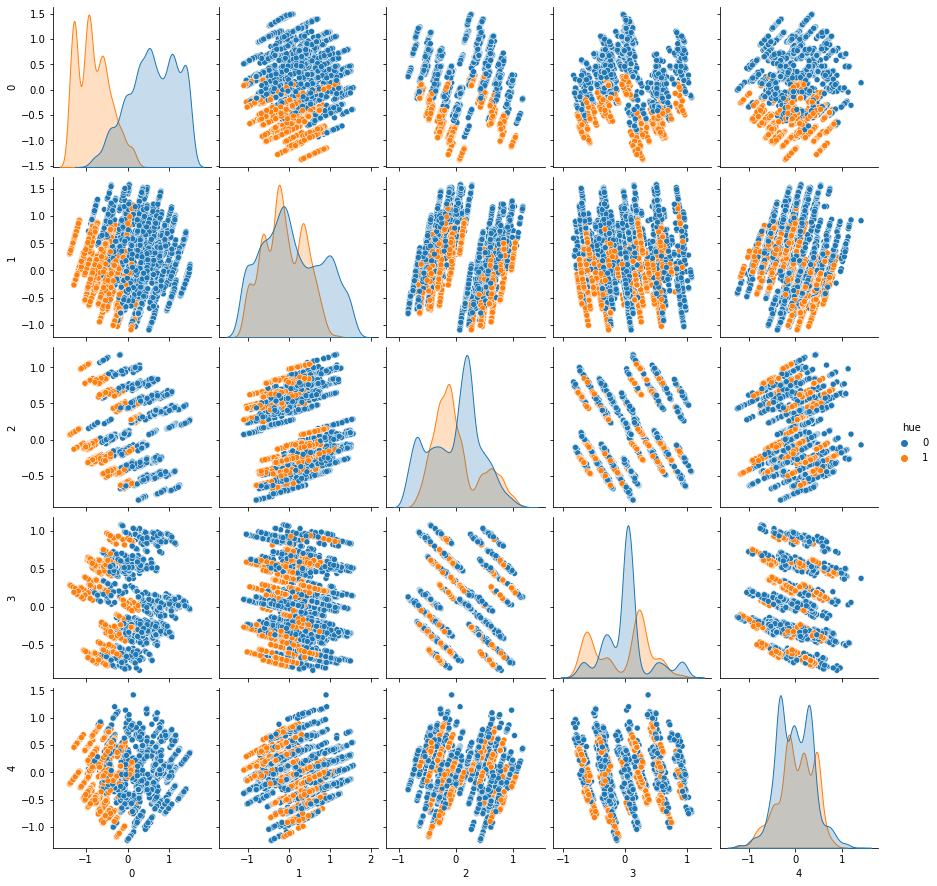

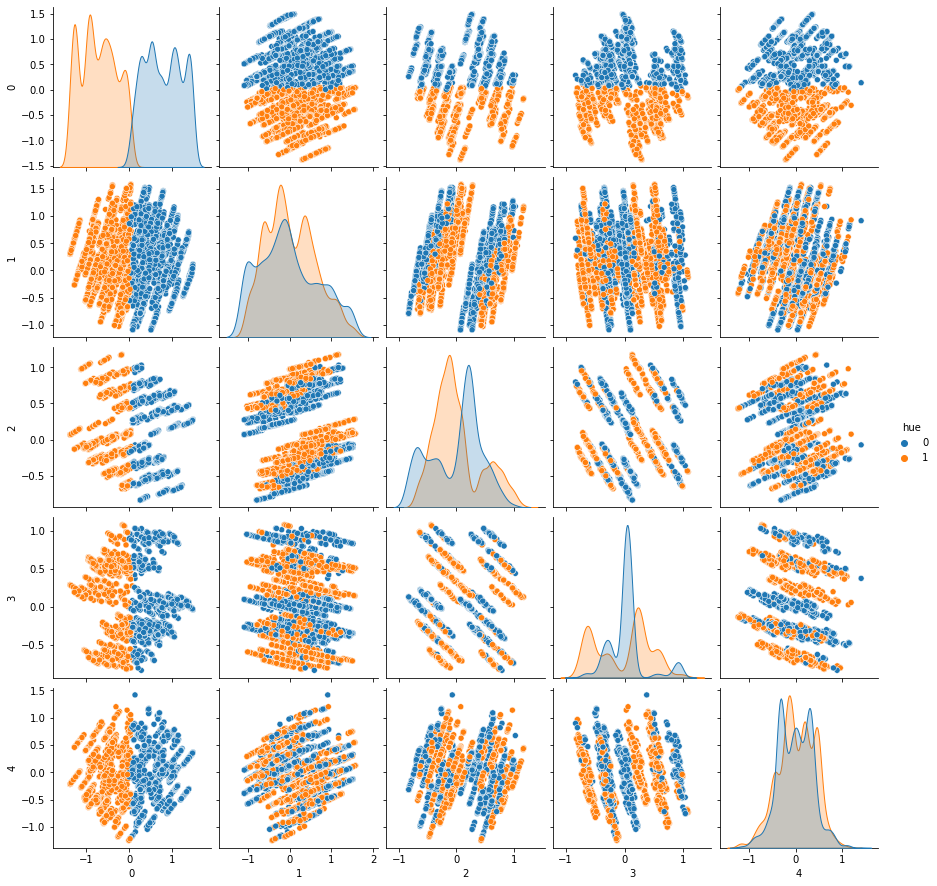

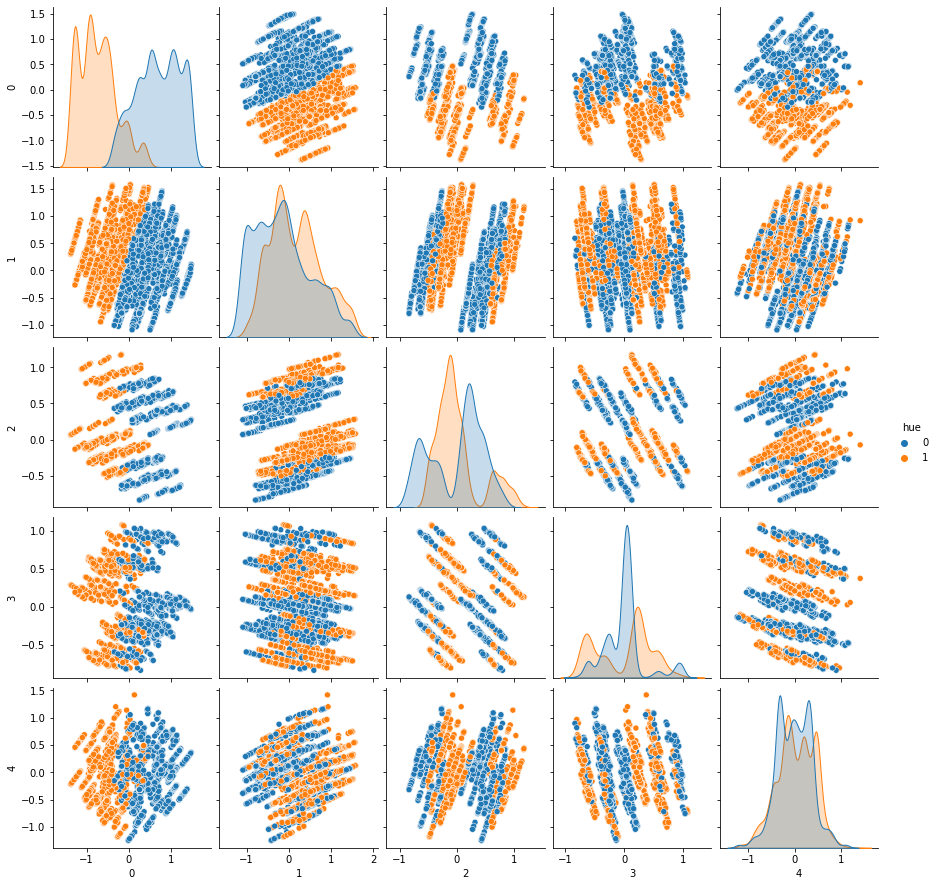

In [ ]:
import seaborn as sns
for i in [y.values, y1, y2, y3]:
    print('--------------------')
    Z = pd.DataFrame(z)
    Z['hue'] = i
    sns.pairplot(data = Z, hue = 'hue')

Al implementar los 3 modelos podemos observar que de los 3 modelos de clasificación el que me da un mejor accuracy es el de Aglomerative clustering, por otro lado el k means tiene mayor precisión, en resumen los 3 métodos tienen un f1 score similar, sin embargo viendo la clasificación de variables, la que mejor representación visual se encuentra entre el Kmedoids y el K means, por lo que para este conjunto de datos seleccionaremos el KMedoids.

---
---

## Tarea 6: SL

Distintos autores han utilizado metodós de Inteligencía artificial para predecir el cuando un cliente iba a 
abandonar, por ejemplo alwani et al. el cual utilizó técnicas de ensamble como Xgboost, AdaBoost, otros autores como Esteves et al. utilizó cinco algoritmos KNN, NaiveBayes, RandomForest, por último Jain realizó un análisis comparativo de distintos modelos donde la regresión logística y los árboles de decisión tomaron especial importancia.

En el presente proyecto utilizaremos una regresión Logística para predecir si un cliente es candidato para abandonar los servicios de telecomunicación.

Las Métricas más relevantes para este tipo de datos son el ROC AUC, precicisión, recall y f1 score los cuales permiten mitigar el efecto de la variable de precición no balanceada (Recordemos que el % de clientes que abandonan es del 14% aproximadamente)

#### Metodólogia

La regresión Logística utiliza la función logística nombrada como función Sigmoidal, para mapear prediciónes y sus probabilidades, esta función es una función en forma de S, la cual convierte un valor de entrada (x) en un rango entre 0 y 1 dado por la siguiente ecuación: 

$$
f(x) = \frac{1}{1-\exp{-x}}
$$

siendo la regresión logistica dada por la siguiente ecuación: 

$$
P(x) = \frac{\exp{(\beta_o+\beta x)}}{1+ \exp{(\beta_o+\beta_1 x)}}
$$
siendo $\beta_0$ el intercepto del argumento y $\beta_1$ el coeficiente que acompaña a la variable independiente.

esta ecuación es similar a una regresión lineal donde las variables de entrada se combinan linealmente para predecir una variable de salida la cual utiliza coeficientes, sin embargo esta regresión permite generar un valor entre 0 y 1 (binaria)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)

scaler = MinMaxScaler() #saga solver requires features to be scaled for model conversion

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[::,1]

print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall of logistic regression classifier on test set: {:.2f}'.format(recall_score(y_test, y_pred)))
#print('Precision of logistic regression classifier on test set: {:.2f}'.format(auc(y_test, y_pred)))
#print('Precision of logistic regression classifier on test set: {:.2f}'.format(roc_auc_score(y_test, y_pred)))

auc = roc_auc_score(y_test, y_pred_proba)
#print AUC score
print('AUC SCORE', auc)

Accuracy of logistic regression classifier on train set: 0.80
Accuracy of logistic regression classifier on test set: 0.79
Precision of logistic regression classifier on test set: 0.65
Recall of logistic regression classifier on test set: 0.51
AUC SCORE 0.8386294225742164


In [ ]:
y.value_counts(normalize = True)

0    0.734215
1    0.265785
Name: Churn_Yes, dtype: float64

In [ ]:
auc = roc_auc_score(y_test, y_pred_proba)
#print AUC score
print(auc)

0.832843466577091


In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

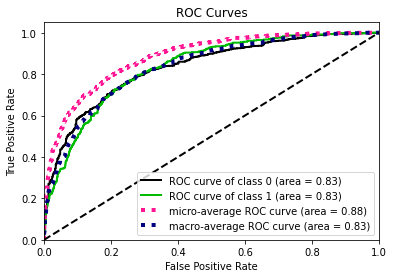

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_roc_curve(np.array(y_test.values), logreg.predict_proba(X_test))

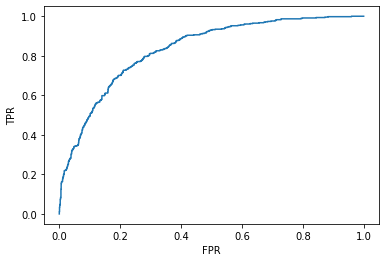

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Evaluación de n Modelos Sin evaluar 30 veces Cada 1
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
clf_list = []
models_list = []
predictions_list = []
for i in range(30):
    print('Iteración: ', i+1 )
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)
    clf = LazyClassifier(verbose = 0, ignore_warnings=True, custom_metric= None)
    clf.random_state = None
    models,predictions = clf.fit(X_train, X_test, y_train, y_test)
    clf_list.append(clf)
    models_list.append(models)
    predictions_list.append(predictions)

Iteración:  1


100%|██████████| 29/29 [00:10<00:00,  2.70it/s]


Iteración:  2


100%|██████████| 29/29 [00:12<00:00,  2.27it/s]


Iteración:  3


100%|██████████| 29/29 [00:14<00:00,  2.04it/s]


Iteración:  4


100%|██████████| 29/29 [00:11<00:00,  2.55it/s]


Iteración:  5


100%|██████████| 29/29 [00:11<00:00,  2.43it/s]


Iteración:  6


100%|██████████| 29/29 [00:09<00:00,  3.03it/s]


Iteración:  7


100%|██████████| 29/29 [00:12<00:00,  2.29it/s]


Iteración:  8


100%|██████████| 29/29 [00:10<00:00,  2.67it/s]


Iteración:  9


100%|██████████| 29/29 [00:11<00:00,  2.54it/s]


Iteración:  10


100%|██████████| 29/29 [00:12<00:00,  2.36it/s]


Iteración:  11


100%|██████████| 29/29 [00:17<00:00,  1.62it/s]


Iteración:  12


100%|██████████| 29/29 [00:17<00:00,  1.63it/s]


Iteración:  13


100%|██████████| 29/29 [00:11<00:00,  2.59it/s]


Iteración:  14


100%|██████████| 29/29 [00:11<00:00,  2.57it/s]


Iteración:  15


100%|██████████| 29/29 [00:13<00:00,  2.20it/s]


Iteración:  16


100%|██████████| 29/29 [00:09<00:00,  3.02it/s]


Iteración:  17


100%|██████████| 29/29 [00:10<00:00,  2.69it/s]


Iteración:  18


100%|██████████| 29/29 [00:11<00:00,  2.59it/s]


Iteración:  19


100%|██████████| 29/29 [00:11<00:00,  2.58it/s]


Iteración:  20


100%|██████████| 29/29 [00:11<00:00,  2.49it/s]


Iteración:  21


100%|██████████| 29/29 [00:10<00:00,  2.84it/s]


Iteración:  22


100%|██████████| 29/29 [00:10<00:00,  2.67it/s]


Iteración:  23


100%|██████████| 29/29 [00:11<00:00,  2.58it/s]


Iteración:  24


100%|██████████| 29/29 [00:12<00:00,  2.41it/s]


Iteración:  25


100%|██████████| 29/29 [00:12<00:00,  2.28it/s]


Iteración:  26


100%|██████████| 29/29 [00:09<00:00,  3.00it/s]


Iteración:  27


100%|██████████| 29/29 [00:10<00:00,  2.66it/s]


Iteración:  28


100%|██████████| 29/29 [00:10<00:00,  2.65it/s]


Iteración:  29


100%|██████████| 29/29 [00:11<00:00,  2.51it/s]


Iteración:  30


100%|██████████| 29/29 [00:12<00:00,  2.29it/s]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, roc_curve, roc_auc_score, f1_score, precision_score, recall_score
import random
from tqdm import tqdm

def getMetricsModel(model, X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)
    import time
    start_time = time.time()
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    time_ = time.time() - start_time 
    results = {'AUC': auc,'F1':  f1,'precision': prec, 'recall':  rec, 'time': time_} 
    return results


models = {'LR' : LogisticRegression(), 'BC': BaggingClassifier(), 'RF': RandomForestClassifier(),'LGBM': LGBMClassifier(),'ADAB' : AdaBoostClassifier()}
results_dict = {}
for it in tqdm(range(30)):
    for i, k in models.items():
        results_dict [i +'_'+ str(it)] =  getMetricsModel(k, X, y)

100%|██████████| 30/30 [00:51<00:00,  1.70s/it]


In [ ]:
bresultados = pd.DataFrame(results_dict).T
resultados = resultados.reset_index()
resultados['Model'] = resultados['index'].apply(lambda x: x.split('_')[0])
resultados

index  AUC   F1  precision  recall  time Model
0       LR_0 0.84 0.56       0.64    0.50  0.18    LR
1       BC_0 0.77 0.52       0.58    0.47  0.60    BC
2       RF_0 0.81 0.53       0.60    0.48  1.91    RF
3     LGBM_0 0.85 0.60       0.61    0.58  0.66  LGBM
4     ADAB_0 0.82 0.54       0.60    0.49  0.34  ADAB
..       ...  ...  ...        ...     ...   ...   ...
145    LR_29 0.86 0.61       0.68    0.55  0.03    LR
146    BC_29 0.78 0.52       0.57    0.47  0.17    BC
147    RF_29 0.78 0.50       0.54    0.47  0.69    RF
148  LGBM_29 0.84 0.57       0.67    0.50  0.12  LGBM
149  ADAB_29 0.86 0.59       0.67    0.53  0.26  ADAB

[150 rows x 7 columns]

In [ ]:
pip install pingouin

In [ ]:
import pingouin as pg
aov = pg.anova(dv='AUC', between='Model', data=resultados[resultados.Model.isin(['LR','LGBM', 'ADAB'])], detailed=True)
aov

Source   SS  DF   MS    F  p-unc  np2
0   Model 0.00   1 0.00 0.36   0.55 0.01
1  Within 0.00  58 0.00  NaN    NaN  NaN

In [ ]:
pg.ttest(x = resultados[resultados.Model == 'LR'].F1, y = resultados[resultados.Model == 'ADAB'].F1)

T  dof alternative  p-val          CI95%  cohen-d   BF10  power
T-test -0.30   29   two-sided   0.77  [-0.01, 0.01]     0.08  0.203   0.07

In [ ]:
pg.ttest(x = resultados[resultados.Model == 'LR'].AUC, y = resultados[resultados.Model == 'ADAB'].AUC)

T  dof alternative  p-val         CI95%  cohen-d   BF10  power
T-test 0.60   58   two-sided   0.55  [-0.0, 0.01]     0.15  0.305   0.09

In [259]:
aov = pg.anova(dv='AUC', between='Model', data=resultados, detailed=True)
print(aov.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
{} &  Source &   SS &   DF &   MS &      F &  p-unc &  np2 \\
\midrule
0 &   Model & 0.12 &    4 & 0.03 & 299.22 &   0.00 & 0.89 \\
1 &  Within & 0.01 &  145 & 0.00 &    NaN &    NaN &  NaN \\
\bottomrule
\end{tabular}



In [ ]:
resultados.groupby('Model')['AUC'].describe()

count  mean  std  min  25%  50%  75%  max
Model                                           
ADAB   30.00  0.84 0.01 0.82 0.84 0.84 0.85 0.86
BC     30.00  0.77 0.01 0.75 0.77 0.77 0.78 0.79
LGBM   30.00  0.83 0.01 0.80 0.82 0.83 0.84 0.85
LR     30.00  0.84 0.01 0.82 0.84 0.85 0.85 0.86
RF     30.00  0.80 0.01 0.78 0.79 0.80 0.81 0.82

In [257]:
print(resultados.groupby('Model')['AUC'].describe().to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &  mean &  std &  min &  25\% &  50\% &  75\% &  max \\
Model &        &       &      &      &      &      &      &      \\
\midrule
ADAB  &  30.00 &  0.84 & 0.01 & 0.82 & 0.84 & 0.84 & 0.85 & 0.86 \\
BC    &  30.00 &  0.77 & 0.01 & 0.75 & 0.77 & 0.77 & 0.78 & 0.79 \\
LGBM  &  30.00 &  0.83 & 0.01 & 0.80 & 0.82 & 0.83 & 0.84 & 0.85 \\
LR    &  30.00 &  0.84 & 0.01 & 0.82 & 0.84 & 0.85 & 0.85 & 0.86 \\
RF    &  30.00 &  0.80 & 0.01 & 0.78 & 0.79 & 0.80 & 0.81 & 0.82 \\
\bottomrule
\end{tabular}



In [ ]:
resultados.groupby('Model')['F1'].describe()

count  mean  std  min  25%  50%  75%  max
Model                                           
ADAB   30.00  0.59 0.02 0.54 0.57 0.59 0.60 0.62
BC     30.00  0.50 0.02 0.47 0.49 0.50 0.51 0.54
LGBM   30.00  0.57 0.02 0.52 0.56 0.57 0.58 0.60
LR     30.00  0.58 0.02 0.55 0.57 0.59 0.60 0.61
RF     30.00  0.53 0.02 0.47 0.51 0.53 0.54 0.57

In [ ]:
models = {'LR' : LogisticRegression(), 'BC': BaggingClassifier(), 'RF': RandomForestClassifier(),'LGBM': LGBMClassifier(),'ADAB' : AdaBoostClassifier()}
results_dict = {}
for it in tqdm(range(30)):
    for i, k in models.items():
        results_dict [i +'_'+ str(it)] =  getMetricsModel(k, X2, y)

100%|██████████| 30/30 [00:56<00:00,  1.89s/it]


In [ ]:
resultados2 = pd.DataFrame(results_dict).T
resultados2 = resultados2.reset_index()
resultados2['Model'] = resultados2['index'].apply(lambda x: x.split('_')[0])
resultados2

index  AUC   F1  precision  recall  time Model
0       LR_0 0.83 0.58       0.65    0.52  0.32    LR
1       BC_0 0.78 0.54       0.60    0.50  0.86    BC
2       RF_0 0.80 0.54       0.60    0.50  1.77    RF
3     LGBM_0 0.84 0.58       0.65    0.53  1.89  LGBM
4     ADAB_0 0.84 0.57       0.63    0.52  0.27  ADAB
..       ...  ...  ...        ...     ...   ...   ...
145    LR_29 0.82 0.56       0.61    0.52  0.04    LR
146    BC_29 0.77 0.49       0.55    0.44  0.17    BC
147    RF_29 0.79 0.50       0.56    0.45  0.66    RF
148  LGBM_29 0.81 0.55       0.62    0.49  0.14  LGBM
149  ADAB_29 0.83 0.57       0.64    0.52  0.28  ADAB

[150 rows x 7 columns]

In [ ]:
resultados2.groupby('Model')['AUC'].describe()

count  mean  std  min  25%  50%  75%  max
Model                                           
ADAB   30.00  0.84 0.01 0.82 0.84 0.84 0.85 0.87
BC     30.00  0.78 0.01 0.76 0.77 0.78 0.78 0.80
LGBM   30.00  0.83 0.01 0.81 0.83 0.83 0.84 0.84
LR     30.00  0.84 0.01 0.82 0.83 0.84 0.85 0.86
RF     30.00  0.80 0.01 0.78 0.79 0.80 0.80 0.82

In [ ]:
resultados.groupby('Model')['AUC'].describe()

count  mean  std  min  25%  50%  75%  max
Model                                           
ADAB   30.00  0.84 0.01 0.82 0.84 0.84 0.85 0.86
BC     30.00  0.77 0.01 0.75 0.77 0.77 0.78 0.79
LGBM   30.00  0.83 0.01 0.80 0.82 0.83 0.84 0.85
LR     30.00  0.84 0.01 0.82 0.84 0.85 0.85 0.86
RF     30.00  0.80 0.01 0.78 0.79 0.80 0.81 0.82

In [ ]:
import pingouin as pg
aov = pg.anova(dv='AUC', between='Model', data=resultados2[resultados2.Model.isin(['LR','LGBM', 'ADAB'])], detailed=True)
aov

Source   SS  DF   MS     F  p-unc  np2
0   Model 0.00   2 0.00 13.89   0.00 0.24
1  Within 0.01  87 0.00   NaN    NaN  NaN

In [260]:
print(pg.ttest(x = resultados2[resultados2.Model == 'LR'].AUC, y = resultados2[resultados2.Model == 'ADAB'].AUC).to_latex())

\begin{tabular}{lrrlrlrlr}
\toprule
{} &     T &  dof & alternative &  p-val &         CI95\% &  cohen-d &   BF10 &  power \\
\midrule
T-test & -0.52 &   58 &   two-sided &   0.60 &  [-0.01, 0.0] &     0.14 &  0.294 &   0.08 \\
\bottomrule
\end{tabular}



In [ ]:
pg.ttest(x = resultados2[resultados2.Model == 'LR'].AUC, y = resultados2[resultados2.Model == 'LGBM'].AUC)

T  dof alternative  p-val         CI95%  cohen-d     BF10  power
T-test 4.29   58   two-sided   0.00  [0.01, 0.02]     1.11  307.399   0.99

In [230]:
pg.ttest(x = resultados2[resultados2.Model == 'ADAB'].AUC, y = resultados2[resultados2.Model == 'LGBM'].AUC)

T  dof alternative  p-val         CI95%  cohen-d     BF10  power
T-test 5.24   58   two-sided   0.00  [0.01, 0.02]     1.35  6258.73   1.00

In [239]:
X3 = df_.iloc[:,:-1]

In [240]:
models = {'LR' : LogisticRegression(), 'BC': BaggingClassifier(), 'RF': RandomForestClassifier(),'LGBM': LGBMClassifier(),'ADAB' : AdaBoostClassifier()}
results_dict = {}
for it in tqdm(range(30)):
    for i, k in models.items():
        results_dict [i +'_'+ str(it)] =  getMetricsModel(k, X3, y)

100%|██████████| 30/30 [02:01<00:00,  4.06s/it]


In [241]:
resultados3 = pd.DataFrame(results_dict).T
resultados3 = resultados3.reset_index()
resultados3['Model'] = resultados3['index'].apply(lambda x: x.split('_')[0])
resultados3

index  AUC   F1  precision  recall  time Model
0       LR_0 0.84 0.61       0.65    0.57  0.07    LR
1       BC_0 0.78 0.52       0.60    0.45  0.39    BC
2       RF_0 0.83 0.58       0.65    0.52  1.24    RF
3     LGBM_0 0.83 0.57       0.62    0.52  1.03  LGBM
4     ADAB_0 0.85 0.59       0.65    0.55  0.62  ADAB
..       ...  ...  ...        ...     ...   ...   ...
145    LR_29 0.85 0.59       0.69    0.52  0.14    LR
146    BC_29 0.78 0.50       0.59    0.43  0.27    BC
147    RF_29 0.83 0.57       0.65    0.50  0.75    RF
148  LGBM_29 0.82 0.53       0.60    0.47  0.19  LGBM
149  ADAB_29 0.84 0.59       0.64    0.55  0.35  ADAB

[150 rows x 7 columns]

In [258]:
print(resultados3.groupby('Model')['AUC'].describe().to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &  mean &  std &  min &  25\% &  50\% &  75\% &  max \\
Model &        &       &      &      &      &      &      &      \\
\midrule
ADAB  &  30.00 &  0.84 & 0.01 & 0.82 & 0.84 & 0.84 & 0.85 & 0.86 \\
BC    &  30.00 &  0.79 & 0.01 & 0.77 & 0.78 & 0.79 & 0.80 & 0.82 \\
LGBM  &  30.00 &  0.83 & 0.01 & 0.82 & 0.83 & 0.83 & 0.84 & 0.85 \\
LR    &  30.00 &  0.84 & 0.01 & 0.83 & 0.84 & 0.84 & 0.85 & 0.86 \\
RF    &  30.00 &  0.82 & 0.01 & 0.80 & 0.81 & 0.82 & 0.83 & 0.84 \\
\bottomrule
\end{tabular}



In [244]:
import pingouin as pg
aov = pg.anova(dv='AUC', between='Model', data=resultados3, detailed=True)
aov

Source   SS   DF   MS      F  p-unc  np2
0   Model 0.06    4 0.01 136.64   0.00 0.79
1  Within 0.01  145 0.00    NaN    NaN  NaN

In [245]:
import pingouin as pg
aov = pg.anova(dv='AUC', between='Model', data=resultados3[resultados3.Model.isin(['LR','LGBM', 'ADAB'])], detailed=True)
aov

Source   SS  DF   MS    F  p-unc  np2
0   Model 0.00   2 0.00 8.67   0.00 0.17
1  Within 0.01  87 0.00  NaN    NaN  NaN

In [246]:
pg.ttest(x = resultados3[resultados3.Model == 'LR'].AUC, y = resultados3[resultados2.Model == 'ADAB'].AUC)

T  dof alternative  p-val         CI95%  cohen-d   BF10  power
T-test -0.28   58   two-sided   0.78  [-0.01, 0.0]     0.07  0.271   0.06